In [13]:
import sklearn
from sklearn import cluster
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import community

In [2]:
co_matrix = pd.read_csv('co_occurence.csv', index_col = 0)

In [30]:
sim = pd.DataFrame(cosine_similarity(co_matrix), index=co_matrix.columns, columns = co_matrix.columns)
sim.head()

,mr speaker,the congress,fellow citizen,the nation,selfgovernment,the preservation,liberty,the hand,the american people,our friend,...,africa,the threat,the united nation,drug,iran,terror,terrorist,iraq,billion dollar,million dollar
mr speaker,1.000000,0.151085,0.478677,0.187273,0.090257,0.179590,0.119522,0.160568,0.198808,0.080581,...,0.140826,0.082125,0.033191,0.077456,0.063604,0.093674,0.106261,0.080366,0.031744,0.050022
the congress,0.151085,1.000000,0.406270,0.849977,0.593742,0.781588,0.703294,0.813046,0.708975,0.376384,...,0.583817,0.370250,0.331427,0.263055,0.339511,0.330741,0.340259,0.347699,0.150751,0.165883
fellow citizen,0.478677,0.406270,1.000000,0.452433,0.344017,0.436207,0.407411,0.356357,0.499625,0.299544,...,0.337163,0.323391,0.220834,0.229841,0.284385,0.246893,0.318342,0.308613,0.057189,0.038573
the nation,0.187273,0.849977,0.452433,1.000000,0.703850,0.858772,0.807959,0.862816,0.838941,0.504282,...,0.633459,0.526838,0.462665,0.329381,0.473000,0.438487,0.472843,0.488846,0.118765,0.131136
selfgovernment,0.090257,0.593742,0.344017,0.703850,1.000000,0.652673,0.766988,0.662361,0.745500,0.513135,...,0.469193,0.566625,0.406833,0.313831,0.535015,0.423646,0.511349,0.549975,0.066478,0.047512


['liberty', 'the american people', 'a nation', 'us', 'peace', 'strength', 'the burden', 'prosperity', 'the world', 'humanity', 'other nation', 'the foundation', 'the face', 'this time', 'the past', 'year', 'resource', 'the growth', 'thousand', 'the way', 'day', 'progress', 'our history', 'production', 'people', 'our effort', 'energy', 'business', 'need', 'something', 'our system', 'enterprise', 'reform', 'the first time', 'crime', 'society', 'the globe', 'the south', 'the force', 'support', 'violence', 'security', 'the peace', 'our people', 'a time', 'the process', 'course', 'the end', 'men', 'safety', 'man', 'a people', 'home', 'the day', 'the community', 'proportion', 'our duty', 'trust', 'civilization', 'way', 'wealth', 'our country', 'the other hand', 'the need', 'the will', 'wisdom', 'his country', 'good', 'independence', 'the welfare', 'the history', 'preparation', 'life', 'happiness', 'matter', 'death', 'population', 'the development', 'danger', 'country', 'the life', 'the futur

drawing labels
making big
saving


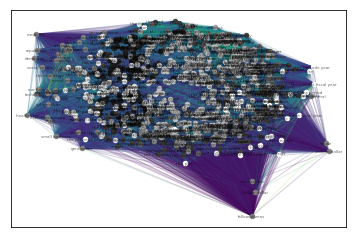

In [31]:
# establish graph
graph = nx.Graph(sim)

edges,weights = zip(*nx.get_edge_attributes(graph,'weight').items())

#first compute the best partition
#partition = community.best_partition(graph)

# first calculate k-means unsupervised
kmeans = cluster.KMeans(n_clusters = 8).fit(sim)
sim['scores'] = kmeans.labels_
partition = sim['scores'].to_dict()

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(graph)
count = 0.
for com in set(partition.values()):
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    print(list_nodes)
    nx.draw_networkx_nodes(graph, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))

print('drawing edges')
nx.draw_networkx_edges(graph, pos, alpha=0.2, edge_color = weights)
print('drawing labels')
nx.draw_networkx_labels(graph, pos, font_size = 4, alpha = 0.6)
#plt.figure(figsize=(100,100))
print('saving')
plt.savefig("testgraph.png", dpi=1500)